In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import normaltest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
MIDA = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/MID-level/MIDA_4.01.csv')
MIDB = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/MID-level/MIDB_4.01.csv')

In [3]:
MIDA.head()

,DispNum3,DispNum4,StDay,StMon,StYear,EndDay,EndMon,EndYear,Outcome,Settle,...,HiAct,HostLev,Recip,NumA,NumB,Link1,Link2,Link3,Ongo2010,Version
0,2,-9,-9,7,1902,24,1,1903,6,1,...,7,3,0,1,1,0,0,0.0,0,4.01
1,3,-9,2,5,1913,25,10,1913,4,3,...,8,3,0,1,1,0,0,0.0,0,4.01
2,4,-9,15,5,1946,13,11,1946,5,3,...,16,4,1,1,1,0,0,0.0,0,4.01
3,7,-9,13,10,1951,26,1,1952,1,3,...,17,4,1,1,1,0,0,0.0,0,4.01
4,8,-9,-9,7,1856,14,3,1857,1,2,...,20,5,1,1,1,0,0,0.0,0,4.01


In [4]:
MIDB[20:25]

,DispNum3,DispNum4,StAbb,ccode,StDay,StMon,StYear,EndDay,EndMon,EndYear,SideA,RevState,RevType1,RevType2,Fatality,FataPre,HiAct,HostLev,Orig,Version
20,13,-9,JPN,740,6,4,1863,17,8,1863,0,0,0,-9,-9,-9,0,1,1,4.01
21,13,-9,UKG,200,6,4,1863,17,8,1863,1,1,2,-9,-9,-9,15,4,1,4.01
22,13,-9,USA,2,20,7,1863,20,7,1863,1,0,0,-9,0,0,1,2,0,4.01
23,13,-9,FRN,220,20,7,1863,20,7,1863,1,0,0,-9,0,0,1,2,0,4.01
24,14,-9,TUR,640,15,10,1895,31,12,1895,0,0,0,-9,0,0,0,1,1,4.01


In [5]:
print("MIDA:", MIDA.shape)
print("MIDB:", MIDB.shape)
print("MIDA info:", MIDA.info())


MIDA: (2586, 24)
MIDB: (6132, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 24 columns):
DispNum3    2586 non-null int64
DispNum4    2586 non-null int64
StDay       2586 non-null int64
StMon       2586 non-null int64
StYear      2586 non-null int64
EndDay      2586 non-null int64
EndMon      2586 non-null int64
EndYear     2586 non-null int64
Outcome     2586 non-null int64
Settle      2586 non-null int64
Fatality    2586 non-null int64
FatalPre    2586 non-null int64
MaxDur      2586 non-null int64
MinDur      2586 non-null int64
HiAct       2586 non-null int64
HostLev     2586 non-null int64
Recip       2586 non-null int64
NumA        2586 non-null int64
NumB        2586 non-null int64
Link1       2586 non-null object
Link2       2586 non-null object
Link3       2583 non-null float64
Ongo2010    2586 non-null int64
Version     2586 non-null float64
dtypes: float64(2), int64(20), object(2)
memory usage: 485.0+ KB
MIDA info: None


In [6]:
print("MIDB info:", MIDB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 20 columns):
DispNum3    6132 non-null int64
DispNum4    6132 non-null int64
StAbb       6132 non-null object
ccode       6132 non-null int64
StDay       6132 non-null int64
StMon       6132 non-null int64
StYear      6132 non-null int64
EndDay      6132 non-null int64
EndMon      6132 non-null int64
EndYear     6132 non-null int64
SideA       6132 non-null int64
RevState    6132 non-null int64
RevType1    6132 non-null int64
RevType2    6132 non-null int64
Fatality    6132 non-null int64
FataPre     6132 non-null int64
HiAct       6132 non-null int64
HostLev     6132 non-null int64
Orig        6132 non-null int64
Version     6132 non-null float64
dtypes: float64(1), int64(18), object(1)
memory usage: 958.2+ KB
MIDB info: None


In [7]:
"""Project McNulty: Classify countries by whether their threats are credible or not."""

'Project McNulty: Classify countries by whether their threats are credible or not.'

In [8]:
MIDA = MIDA.replace(-9, np.nan)
MIDB = MIDB.replace(-9, np.nan)
MIDA['Outcome'] = MIDA.Outcome.replace(8, -9)
MIDA['Settle'] = MIDA.Settle.replace(4, -9)

In [9]:
MIDA.Outcome.value_counts()

5.0    1732
7.0     193
6.0     146
4.0     135
1.0     131
3.0      64
2.0      60
9.0      24
Name: Outcome, dtype: int64

In [10]:
#del MIDA['DispNum4']
MIDA_no_null = MIDA.dropna(axis=0, how='any')
MIDA_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 2235 to 2584
Data columns (total 24 columns):
DispNum3    212 non-null int64
DispNum4    212 non-null float64
StDay       212 non-null float64
StMon       212 non-null int64
StYear      212 non-null int64
EndDay      212 non-null float64
EndMon      212 non-null int64
EndYear     212 non-null int64
Outcome     212 non-null float64
Settle      212 non-null float64
Fatality    212 non-null float64
FatalPre    212 non-null float64
MaxDur      212 non-null int64
MinDur      212 non-null int64
HiAct       212 non-null int64
HostLev     212 non-null int64
Recip       212 non-null int64
NumA        212 non-null int64
NumB        212 non-null int64
Link1       212 non-null object
Link2       212 non-null object
Link3       212 non-null float64
Ongo2010    212 non-null int64
Version     212 non-null float64
dtypes: float64(9), int64(13), object(2)
memory usage: 41.4+ KB


In [11]:
MIDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 24 columns):
DispNum3    2586 non-null int64
DispNum4    262 non-null float64
StDay       2284 non-null float64
StMon       2586 non-null int64
StYear      2586 non-null int64
EndDay      2298 non-null float64
EndMon      2586 non-null int64
EndYear     2586 non-null int64
Outcome     2485 non-null float64
Settle      2499 non-null float64
Fatality    2313 non-null float64
FatalPre    1910 non-null float64
MaxDur      2586 non-null int64
MinDur      2586 non-null int64
HiAct       2586 non-null int64
HostLev     2586 non-null int64
Recip       2586 non-null int64
NumA        2586 non-null int64
NumB        2586 non-null int64
Link1       2586 non-null object
Link2       2586 non-null object
Link3       2583 non-null float64
Ongo2010    2586 non-null int64
Version     2586 non-null float64
dtypes: float64(9), int64(13), object(2)
memory usage: 485.0+ KB


In [12]:
MIDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 20 columns):
DispNum3    6132 non-null int64
DispNum4    564 non-null float64
StAbb       6132 non-null object
ccode       6132 non-null int64
StDay       5473 non-null float64
StMon       6132 non-null int64
StYear      6132 non-null int64
EndDay      5500 non-null float64
EndMon      6132 non-null int64
EndYear     6132 non-null int64
SideA       6132 non-null int64
RevState    6132 non-null int64
RevType1    6132 non-null int64
RevType2    1333 non-null float64
Fatality    5505 non-null float64
FataPre     4623 non-null float64
HiAct       6132 non-null int64
HostLev     6132 non-null int64
Orig        6132 non-null int64
Version     6132 non-null float64
dtypes: float64(7), int64(12), object(1)
memory usage: 958.2+ KB


In [13]:
#MIDA.to_csv('MIDA.csv')
#MIDB.to_csv('MIDB.csv')

In [14]:
#MIDA = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/MIDA.csv')
#MIDB = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/MIDB.csv')

In [15]:
#del MIDA['Unnamed: 0']


In [16]:
MIDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 24 columns):
DispNum3    2586 non-null int64
DispNum4    262 non-null float64
StDay       2284 non-null float64
StMon       2586 non-null int64
StYear      2586 non-null int64
EndDay      2298 non-null float64
EndMon      2586 non-null int64
EndYear     2586 non-null int64
Outcome     2485 non-null float64
Settle      2499 non-null float64
Fatality    2313 non-null float64
FatalPre    1910 non-null float64
MaxDur      2586 non-null int64
MinDur      2586 non-null int64
HiAct       2586 non-null int64
HostLev     2586 non-null int64
Recip       2586 non-null int64
NumA        2586 non-null int64
NumB        2586 non-null int64
Link1       2586 non-null object
Link2       2586 non-null object
Link3       2583 non-null float64
Ongo2010    2586 non-null int64
Version     2586 non-null float64
dtypes: float64(9), int64(13), object(2)
memory usage: 485.0+ KB


In [17]:
#del MIDB['Unnamed: 0']


In [18]:
MIDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 20 columns):
DispNum3    6132 non-null int64
DispNum4    564 non-null float64
StAbb       6132 non-null object
ccode       6132 non-null int64
StDay       5473 non-null float64
StMon       6132 non-null int64
StYear      6132 non-null int64
EndDay      5500 non-null float64
EndMon      6132 non-null int64
EndYear     6132 non-null int64
SideA       6132 non-null int64
RevState    6132 non-null int64
RevType1    6132 non-null int64
RevType2    1333 non-null float64
Fatality    5505 non-null float64
FataPre     4623 non-null float64
HiAct       6132 non-null int64
HostLev     6132 non-null int64
Orig        6132 non-null int64
Version     6132 non-null float64
dtypes: float64(7), int64(12), object(1)
memory usage: 958.2+ KB


In [19]:
MIDB.DispNum3.isnull().value_counts()

False    6132
Name: DispNum3, dtype: int64

In [20]:
MID_Total = MIDA.set_index('DispNum3').join(MIDB.set_index('DispNum3'), lsuffix='_A', rsuffix='_B')
MID_Total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 2 to 4599
Data columns (total 42 columns):
DispNum4_A    564 non-null float64
StDay_A       5460 non-null float64
StMon_A       6132 non-null int64
StYear_A      6132 non-null int64
EndDay_A      5519 non-null float64
EndMon_A      6132 non-null int64
EndYear_A     6132 non-null int64
Outcome       5898 non-null float64
Settle        5851 non-null float64
Fatality_A    5450 non-null float64
FatalPre      4274 non-null float64
MaxDur        6132 non-null int64
MinDur        6132 non-null int64
HiAct_A       6132 non-null int64
HostLev_A     6132 non-null int64
Recip         6132 non-null int64
NumA          6132 non-null int64
NumB          6132 non-null int64
Link1         6132 non-null object
Link2         6132 non-null object
Link3         6126 non-null float64
Ongo2010      6132 non-null int64
Version_A     6132 non-null float64
DispNum4_B    564 non-null float64
StAbb         6132 non-null object
ccode         6132 non

In [21]:
MID_Total.columns

Index(['DispNum4_A', 'StDay_A', 'StMon_A', 'StYear_A', 'EndDay_A', 'EndMon_A',
       'EndYear_A', 'Outcome', 'Settle', 'Fatality_A', 'FatalPre', 'MaxDur',
       'MinDur', 'HiAct_A', 'HostLev_A', 'Recip', 'NumA', 'NumB', 'Link1',
       'Link2', 'Link3', 'Ongo2010', 'Version_A', 'DispNum4_B', 'StAbb',
       'ccode', 'StDay_B', 'StMon_B', 'StYear_B', 'EndDay_B', 'EndMon_B',
       'EndYear_B', 'SideA', 'RevState', 'RevType1', 'RevType2', 'Fatality_B',
       'FataPre', 'HiAct_B', 'HostLev_B', 'Orig', 'Version_B'],
      dtype='object')

In [22]:
MID_merge = MIDA.set_index('DispNum3').merge(MIDB.set_index('DispNum3'))
MID_merge.head()

,DispNum4,StDay,StMon,StYear,EndDay,EndMon,EndYear,Outcome,Settle,Fatality,...,Ongo2010,Version,StAbb,ccode,SideA,RevState,RevType1,RevType2,FataPre,Orig
0,NaN,NaN,7,1902,24.0,1,1903,6.0,1.0,0.0,...,0,4.01,USA,2,1,1,1,NaN,0.0,1
1,NaN,2.0,5,1913,25.0,10,1913,4.0,3.0,0.0,...,0,4.01,AUH,300,1,1,2,NaN,0.0,1
2,NaN,13.0,10,1951,26.0,1,1952,1.0,3.0,2.0,...,0,4.01,EGY,651,0,1,2,NaN,NaN,1
3,NaN,NaN,7,1856,14.0,3,1857,1.0,2.0,6.0,...,0,4.01,IRN,630,0,0,0,NaN,NaN,1
4,NaN,NaN,7,1856,14.0,3,1857,1.0,2.0,6.0,...,0,4.01,UKG,200,1,1,2,NaN,NaN,1


In [23]:
MID_Total.HostLev_A.value_counts()

4    3858
3    1568
5     464
2     242
Name: HostLev_A, dtype: int64

In [24]:
MIDA_mask = MIDA.Outcome.notnull()
MIDA = MIDA[MIDA_mask]
MID_Total_mask = MID_Total.Outcome.notnull()
MID_Total = MID_Total[MID_Total_mask]


In [25]:
MID_Total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5898 entries, 2 to 4598
Data columns (total 42 columns):
DispNum4_A    521 non-null float64
StDay_A       5244 non-null float64
StMon_A       5898 non-null int64
StYear_A      5898 non-null int64
EndDay_A      5324 non-null float64
EndMon_A      5898 non-null int64
EndYear_A     5898 non-null int64
Outcome       5898 non-null float64
Settle        5739 non-null float64
Fatality_A    5232 non-null float64
FatalPre      4092 non-null float64
MaxDur        5898 non-null int64
MinDur        5898 non-null int64
HiAct_A       5898 non-null int64
HostLev_A     5898 non-null int64
Recip         5898 non-null int64
NumA          5898 non-null int64
NumB          5898 non-null int64
Link1         5898 non-null object
Link2         5898 non-null object
Link3         5892 non-null float64
Ongo2010      5898 non-null int64
Version_A     5898 non-null float64
DispNum4_B    521 non-null float64
StAbb         5898 non-null object
ccode         5898 non

In [26]:
everything = ([MID_Total.Outcome, MID_Total.Settle, MID_Total.Fatality_A, MID_Total.HiAct_A, MID_Total.HostLev_A, 
               MID_Total.RevType1, MID_Total.RevType2, MID_Total.Fatality_B, MID_Total.HiAct_B, MID_Total.HostLev_B]
)
MID_Total.Outcome.astype('category')
MID_Total.Settle.astype('category')
MID_Total.Fatality_A.astype('category')
MID_Total.HiAct_A.astype('category')
MID_Total.HostLev_A.astype('category')
MID_Total.RevType1.astype('category')
MID_Total.RevType2.astype('category')
MID_Total.Fatality_B.astype('category')
MID_Total.HiAct_B.astype('category')
MID_Total.HostLev_B.astype('category')
MID_Total.StAbb.astype('category')
MID_Total.ccode.astype('category')
MID_Total.SideA.astype('category')
MID_Total.Recip.astype('category')
MID_Total.RevState.astype('category')


DispNum3
2       1
2       1
3       0
3       1
4       0
4       0
7       0
7       1
8       0
8       1
9       0
9       1
11      0
11      1
12      0
12      0
12      0
12      0
12      1
12      0
13      0
13      1
13      0
13      0
14      0
14      1
15      1
15      1
16      0
16      0
       ..
4583    0
4583    0
4584    1
4584    0
4586    1
4586    0
4587    1
4587    0
4588    1
4588    1
4589    0
4589    0
4590    0
4590    0
4591    0
4591    1
4592    0
4592    1
4593    0
4593    0
4594    0
4594    0
4595    0
4595    0
4596    1
4596    0
4597    0
4597    0
4598    1
4598    1
Name: RevState, Length: 5898, dtype: category
Categories (2, int64): [0, 1]

5.0    3868
1.0     436
7.0     397
4.0     369
6.0     345
2.0     243
3.0     181
9.0      59
Name: Outcome, dtype: int64


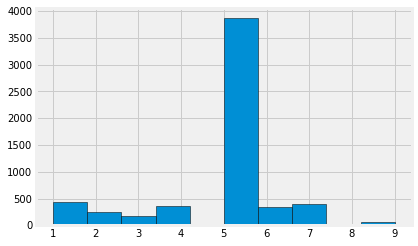

In [27]:
MID_Total.Outcome.hist(edgecolor='black')
print(MID_Total.Outcome.value_counts())

In [28]:
MID_last_50 = MID_Total[MID_Total['EndYear_A'] > 1960]

In [29]:
MID_last_50.StAbb.value_counts()

USA    198
IRN    134
CHN    124
USR    113
IRQ    109
ISR     91
TUR     84
IND     78
JPN     68
SYR     62
THI     61
RUS     58
UKG     57
EGY     54
ROK     52
PAK     52
PRK     49
ETH     46
GRC     44
SUD     44
FRN     39
UGA     38
LIB     36
SOM     32
SAU     31
ZAM     31
TAW     31
MYA     30
SPN     29
ARG     29
      ... 
SLO      2
LES      2
MAW      2
MON      2
MEX      2
SOL      2
NAM      2
GAM      2
LAT      2
KZK      2
URU      2
BOL      2
GNB      2
CEN      2
AAB      1
BHM      1
DMA      1
GRN      1
COM      1
PAL      1
SLU      1
JAM      1
LIE      1
MAG      1
SVG      1
TKM      1
MAD      1
BLR      1
BAR      1
PAR      1
Name: StAbb, Length: 181, dtype: int64

In [30]:
MID_Total['Stalemate'] = (MID_Total['Outcome'] == 5).astype(int)

In [31]:
no_mate_mask = MID_Total['Outcome'] != 5
MID_no_mate = MID_Total[no_mate_mask]
MID_no_mate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 2 to 4592
Data columns (total 43 columns):
DispNum4_A    65 non-null float64
StDay_A       1729 non-null float64
StMon_A       2030 non-null int64
StYear_A      2030 non-null int64
EndDay_A      1843 non-null float64
EndMon_A      2030 non-null int64
EndYear_A     2030 non-null int64
Outcome       2030 non-null float64
Settle        1904 non-null float64
Fatality_A    1738 non-null float64
FatalPre      1200 non-null float64
MaxDur        2030 non-null int64
MinDur        2030 non-null int64
HiAct_A       2030 non-null int64
HostLev_A     2030 non-null int64
Recip         2030 non-null int64
NumA          2030 non-null int64
NumB          2030 non-null int64
Link1         2030 non-null object
Link2         2030 non-null object
Link3         2028 non-null float64
Ongo2010      2030 non-null int64
Version_A     2030 non-null float64
DispNum4_B    65 non-null float64
StAbb         2030 non-null object
ccode         2030 non-n

In [32]:
MID_no_mate.Outcome.value_counts()

1.0    436
7.0    397
4.0    369
6.0    345
2.0    243
3.0    181
9.0     59
Name: Outcome, dtype: int64

In [33]:
print(MID_Total.Stalemate.value_counts())
print("There is a stalemate", round(100 * (3868 / (3868 + 2030)), 2), "percent of the time")

1    3868
0    2030
Name: Stalemate, dtype: int64
There is a stalemate 65.5815530688369 percent of the time


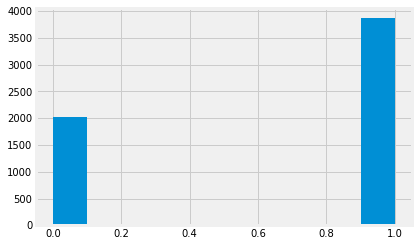

In [34]:
MID_Total.Stalemate.hist()

In [35]:
MID_Total.to_csv('MID_Total.csv', na_rep=np.NaN)

In [36]:
MID_Total.ccode.value_counts()

2      366
365    355
200    256
710    234
220    171
740    171
640    168
255    158
630    157
666    127
325    126
645    119
750    101
652     88
350     88
651     84
800     79
230     74
770     74
160     70
135     70
732     66
345     61
155     60
713     58
530     54
731     52
100     51
355     50
130     47
      ... 
481      3
273      2
482      2
553      2
570      2
940      2
337      2
705      2
565      2
404      2
420      2
275      2
317      2
53       1
56       1
57       1
986      1
223      1
31       1
280      1
58       1
581      1
332      1
55       1
701      1
370      1
781      1
580      1
54       1
51       1
Name: ccode, Length: 192, dtype: int64

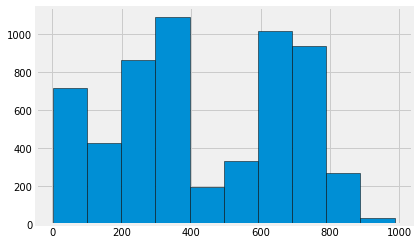

In [37]:
MID_Total.ccode.hist(edgecolor='Black')

0     436
7     276
17    255
20    237
15    216
16    190
14    142
1      82
13     59
8      31
21     26
12     25
10     21
11     19
18      7
3       4
4       2
2       2
Name: HiAct_B, dtype: int64
AxesSubplot(0.08,0.125;0.87x0.755)


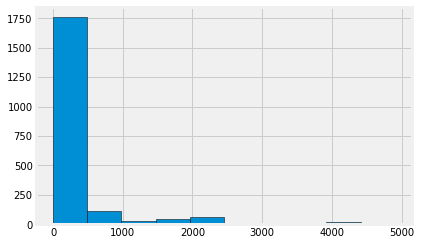

In [38]:
print(MID_no_mate.HiAct_B.value_counts())
print(MID_no_mate.MaxDur.hist(edgecolor='black'))

In [48]:
x_list2 = (['Settle', 'Fatality_B', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'Orig'])
x_list = (['HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode'])
X = MID_no_mate[x_list]
y = MID_no_mate.Outcome
#X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [41]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print(lm1.score(X_test, y_test))


0.4827586206896552


In [43]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5123152709359606

In [44]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.4433497536945813

In [45]:
param_grid = {'C': np.linspace(1e-7,1e2,11)}
grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-07, 1.e+01, 2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01,
       8.e+01, 9.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6330049261083743

In [47]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6674876847290641

In [ ]:
MID_Total.DispNum4_A.unique()

In [ ]:
"""#MID_Total = MID_Total.fillna(-9)
MID_Total = MID_Total.replace(np.nan, -9)
MID_no_mate = MID_no_mate.replace(np.nan, -9)
change = ['DispNum4_A', 'StDay_A', 'EndDay_B', 'Outcome', 'Settle', 'Fatality_A', 'FatalPre', 'DispNum4_B', 'StDay_B', 'RevType2', 'Fatality_B', 'FataPre']
for x in change:
    MID_Total[x] = MID_Total[x].astype('int')
    MID_no_mate[x] = MID_no_mate[x].astype('int')

MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')
MID_Total['Outcome'] = MID_Total['Outcome'].astype('int')
MID_Total['Settle'] = MID_Total['Settle'].astype('int')
MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')
MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')
MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')
MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')
MID_Total['StDay_A'] = MID_Total['StDay_A'].astype('int')"""


In [ ]:
MID_no_mate.info()

In [ ]:
MID_Total = MID_Total.replace(-9, np.nan)
MID_no_mate = MID_no_mate.replace(-9, np.nan)
MID_Total.info()

In [ ]:
MID_no_mate.info()

In [ ]:
print(MID_Total.Stalemate.value_counts())
print("There is a stalemate", round(100 * (3868 / (3868 + 2030)), 2), "percent of the time.")

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(X2_train, y2_train)
dt2.score(X2_test, y2_test)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=50)
rf2.fit(X2_train, y2_train)
rf2.score(X2_test, y2_test)

In [ ]:
import pandas.io.sql as pd_sql
# Postgres info to connect

connection_args = {
    'host': '13.58.222.85', # You'll have to update this to your IP
    'user': 'ubuntu',    # username
    'dbname': 'names',   # DB that we are connecting to
    'port': 5432         # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)

In [ ]:
MID_Total.info()

In [ ]:
"""CREATE TABLE MID_Total (
DispNum3 INT,
DispNum4_A INT,
StDay_A INT,
StMon_A INT,
StYear_A INT,
EndDay_A INT,
EndMon_A INT,
EndYear_A INT,
Outcome INT,
Settle INT,
Fatality_A INT,
FatalPre INT,
MaxDur INT,
MinDur INT,
HiAct_A INT,
HostLev_A INT,
Recip INT,
NumA INT,
NumB INT,
Link1 TEXT,
Link2 TEXT,
Link3 DOUBLE PRECISION,
Ongo2010 INT,
Version_A DOUBLE PRECISION,
DispNum4_B INT,
StAbb TEXT,
ccode INT,
StDay_B INT,
StMon_B INT,
StYear_B INT,
EndDay_B INT,
EndMon_B INT,
EndYear_B INT,
SideA INT,
RevState INT,
RevType1 INT,
RevType2 INT,
Fatality_B INT,
FataPre INT,
HiAct_B INT,
HostLev_B INT,
Orig INT,
Version_B DOUBLE PRECISION,
Stalemate INT
);
"""

In [ ]:
"""CREATE TABLE mid_no_mate (
DispNum3 INT,
DispNum4_A DOUBLE PRECISION,
StDay_A DOUBLE PRECISION,
StMon_A INT,
StYear_A INT,
EndDay_A DOUBLE PRECISION,
EndMon_A INT,
EndYear_A INT,
Outcome DOUBLE PRECISION,
Settle DOUBLE PRECISION,
Fatality_A DOUBLE PRECISION,
FatalPre DOUBLE PRECISION,
MaxDur INT,
MinDur INT,
HiAct_A INT,
HostLev_A INT,
Recip INT,
NumA INT,
NumB INT,
Link1 INT,
Link2 INT,
Link3 DOUBLE PRECISION,
Ongo2010 INT,
Version_A DOUBLE PRECISION,
DispNum4_B DOUBLE PRECISION,
StAbb TEXT,
ccode INT,
StDay_B DOUBLE PRECISION,
StMon_B INT,
StYear_B INT,
EndDay_B DOUBLE PRECISION,
EndMon_B INT,
EndYear_B INT,
SideA INT,
RevState INT,
RevType1 INT,
RevType2 DOUBLE PRECISION,
Fatality_B DOUBLE PRECISION,
FataPre DOUBLE PRECISION,
HiAct_B INT,
HostLev_B INT,
Orig INT,
Version_B DOUBLE PRECISION,
Stalemate INT
);"""


In [ ]:
MID_no_mate.head()

In [ ]:
MID_Total.info()

In [ ]:
MID_no_mate.head()

In [ ]:
MID_Total.to_csv('MID_Total.csv', index=False)
MID_no_mate.to_csv('MID_no_mate.csv')

In [ ]:
MID_Total = pd.read_csv('MID_Total.csv')
MID_no_mate = pd.read_csv('MID_no_mate.csv')

In [ ]:
MID_Total.Outcome.astype('category')
MID_Total.Settle.astype('category')
MID_Total.Fatality_A.astype('category')
MID_Total.HiAct_A.astype('category')
MID_Total.HostLev_A.astype('category')
MID_Total.RevType1.astype('category')
MID_Total.RevType2.astype('category')
MID_Total.Fatality_B.astype('category')
MID_Total.HiAct_B.astype('category')
MID_Total.HostLev_B.astype('category')
MID_Total.StAbb.astype('category')
MID_Total.ccode.astype('category')
MID_Total.SideA.astype('category')
MID_Total.Recip.astype('category')
MID_Total.RevState.astype('category')

In [ ]:
MID_Total = MID_Total.replace(np.nan, -9)
MID_no_mate = MID_no_mate.replace(np.nan, -9)

In [ ]:
MID_no_mate.FataPre.unique()

In [ ]:
model = RandomForestClassifier(n_estimators=50)
parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)


In [ ]:
x_list = (['Settle', 'Fatality_B', 'FataPre', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X = MID_no_mate[x_list]
y = MID_no_mate.Outcome
#X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, n_jobs=1)
bc.fit(X_train, y_train)
outcome_score = bc.score(X_test, y_test)
print("Second model predicts the outcome", round(100 * outcome_score, 2), "percent of the time.")

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
for feat, imp in zip(range(1, 12), rf.feature_importances_):
    print("Feat %i: "%feat, imp)

In [ ]:
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [ ]:
MID_Total.info()

In [ ]:
MID_Total.Link1.unique()

In [ ]:
x_list = (['HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode'])

In [ ]:
MID_Total = MID_Total.replace('147W', '147')
x_list = (['Settle', 'Fatality_B', 'FataPre', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X2 = MID_Total[x_list]
y2 = MID_Total.Stalemate
#X = X.reshape(-1, 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2, random_state=42)
ss = StandardScaler()
X2_train = ss.fit_transform(X2_train)
X2_test = ss.transform(X2_test)

In [ ]:
n_estimators=50

In [ ]:
bc2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, n_jobs=1)
bc2.fit(X2_train, y2_train)
stalemate_score = bc2.score(X2_test, y2_test)
print("First model predicts a stalemate", round(100 * stalemate_score,2), "percent of the time.")

In [ ]:
rf2 = RandomForestClassifier(n_estimators=50)
rf2.fit(X2_train, y2_train)
rf2.score(X2_test, y2_test)

In [ ]:
for feat, imp in zip(range(1, 12), rf2.feature_importances_):
    print("Feat %i: "%feat, imp)

In [ ]:
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X2_train, y2_train)
    train_score.append(dt.score(X2_train, y2_train))
    test_score.append(dt.score(X2_test, y2_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");